<a href="https://colab.research.google.com/github/programmerfaz/Machine-learning-Projects/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Breast Cancer Prediction Using Machine Learning

Breast cancer is a common disease that affects the cells in the breast, and early detection is key to effective treatment. This project focuses on creating a system to predict whether a breast tumor is benign (non-cancerous) or malignant (cancerous) using machine learning.

The predictive system will use the Support Vector Machine (SVM) algorithm. SVM is a powerful tool for classification tasks and works by finding the best boundary that separates data into categories. By training the system on a dataset containing information about tumors, such as size and texture, it will be able to make accurate predictions to assist in early diagnosis.


In [47]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Collecting the dataset for breast cancer from the https://archive.ics.uci.edu/

In [ ]:
#reading the data file

cancer_dataset = pd.read_csv("/content/drive/MyDrive/DATASET/breast+cancer+wisconsin+diagnostic/data.csv")

In [ ]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer_dataset.shape

(569, 33)

In [ ]:
#removing the unnecessary column
cancer_dataset = cancer_dataset.drop(columns=["Unnamed: 32"], axis=1)

In [ ]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
cancer_dataset["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


B --> Benign

M --> Malignant

In [ ]:
cancer_dataset.groupby("diagnosis").mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Separating the data, separating the features and labels

In [ ]:
#separating the data into features and labels
X = cancer_dataset.drop(columns=["diagnosis"], axis=1)
Y = cancer_dataset["diagnosis"]

In [ ]:
print(X)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [ ]:
print(Y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Preprocessing: Standardizing the data before we split the data into training and testing

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
X_std = scaler.transform(X)

In [ ]:
print(X_std)

[[-0.23640517  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
X = X_std
Y = cancer_dataset["diagnosis"]

In [ ]:
#printing the standarized data
print(X)

[[-0.23640517  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
print(Y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [ ]:
#spliting the data for training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(569, 31) (455, 31) (114, 31)


569 is the total rows and 455 is row splitted for training the model and 114 is the dataset that is going to be used for testing the dataset

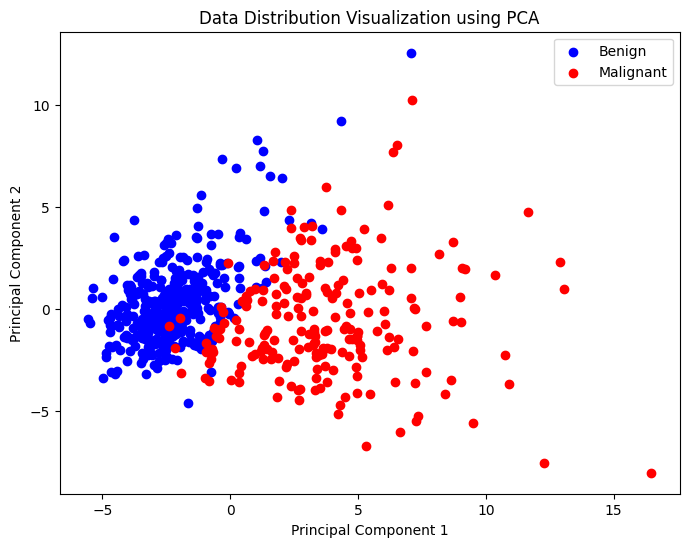

In [ ]:
#X is your feature data and Y is your target variable (predictor whether B or M)

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[Y == 'B', 0], X_pca[Y == 'B', 1], color='blue', label='Benign')
plt.scatter(X_pca[Y == 'M', 0], X_pca[Y == 'M', 1], color='red', label='Malignant')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Distribution Visualization using PCA')
plt.legend()
plt.show()

From the graph above it can be suggested that SVM algorithm can give a good accuracy score to predict whether the new patient with the input or independent variables will be diagnosed with a breast cancer or not. In this SVM will create plane that will separate the blue and red datapoints acting as a classifier

In [ ]:
#using the clsassifier model of SVC support vector machine to train our model
classifier = svm.SVC(kernel="linear") #linear because our data is linearly distributed

In [ ]:
#training the model using SVC
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

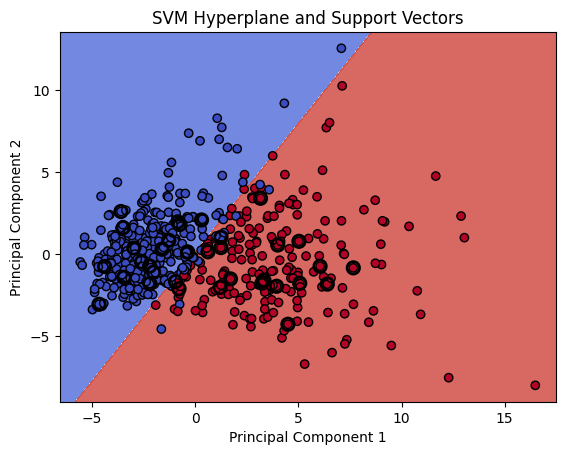

In [50]:
#we have trained the 'classifier' (SVM model) and have X, Y data

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class labels for each point in the meshgrid
Z = classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
# Convert predictions to numerical values (0 for 'B', 1 for 'M')
Z_numeric = [0 if val == 'B' else 1 for val in Z]
Z_numeric = np.array(Z_numeric).reshape(xx.shape) # Reshape back to xx shape

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z_numeric, cmap=plt.cm.coolwarm, alpha=0.8)  # Decision boundary
# Convert original labels to numerical for plotting
Y_numeric = [0 if val == 'B' else 1 for val in Y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_numeric, cmap=plt.cm.coolwarm, edgecolors='k')  # Data points

# Highlight support vectors
plt.scatter(X_pca[classifier.support_, 0], X_pca[classifier.support_, 1], s=80, facecolors='none', edgecolors='k', linewidths=2)  # Support vectors

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Hyperplane and Support Vectors')
plt.show()

From the graph above it can be seen that a hyperplane separates out the benign and malign breast cancer with a plane and corressponding supporting vectors are higlighted

Evaluating the model

In [51]:
#testing the accuracy score for our training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [52]:
print(training_data_accuracy*100)

99.12087912087912


In [56]:
#testing the accuracy of our testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [57]:
print(testing_data_accuracy*100)

95.6140350877193


From the above results it is clear that that accuracy score of our training data is 78% where as for the testing data it is 77%.

Making a predictive system

In [65]:
input_data = (842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

#coverting the data to numpy array
np_data = np.asarray(input_data)

# Convert the input data to a DataFrame with matching column names
columns = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
input_df = pd.DataFrame([input_data], columns=columns)

#standardizing the converrted data
std_data = scaler.transform(input_df)
# print(std_data)

prediction = classifier.predict(std_data)
# print(prediction)
if (prediction[0] == "M"):
  print("The person is diagnosed with cancer (Malignant) ")
else:
  print("The person is not diagnosed with cancer (Benign)")

The person is diagnosed with cancer (Malignant) 


In [66]:
input_data = (858477,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,0.1559,0.5796,1.046,8.322,0.01011,0.01055,0.01981,0.005742,0.0209,0.002788,9.507,15.4,59.9,274.9,0.1733,0.1239,0.1168,0.04419,0.322,0.09026
)
#coverting the data to numpy array
np_data = np.asarray(input_data)

# Convert the input data to a DataFrame with matching column names
columns = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
input_df = pd.DataFrame([input_data], columns=columns)

#standardizing the converrted data
std_data = scaler.transform(input_df)
# print(std_data)

prediction = classifier.predict(std_data)
# print(prediction)
if (prediction[0] == "M"):
  print("The person is diagnosed with cancer (Malignant) ")
else:
  print("The person is not diagnosed with cancer (Benign)")

The person is not diagnosed with cancer (Benign)
